# Pertanyaan Bisnis
- Bagaimana perbedaan angka kasus aktif antara pulau?
- Bagaimana densitas penduduk memengaruhi tingkat kematian atau pemulihan?

# Import Library

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.preprocessing import LabelEncoder

## Gathering Data

In [4]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


## Exploring Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [6]:
data.shape

(31822, 38)

In [19]:
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths,Island_encoded,Cluster
count,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.0,...,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000
mean,122.883571,2.753342,119.145321,0.984907,47100.672273,1149.975852,42698.630013,3252.066408,14.394135,1.0,...,-4.950566,39.720276,15644.455270,0.805326,354.041281,35.403894,1.391876,0.945183,0.648987,0.980595
std,334.071136,9.641345,400.858064,375.480092,64060.631690,1909.834988,60915.019223,5994.568298,10.000599,0.0,...,2.409285,96.592344,17733.905608,2.679178,515.814196,51.581530,2.437616,0.742035,0.477390,0.688913
min,0.000000,0.000000,0.000000,-7905.000000,1.000000,0.000000,1.000000,-2.000000,4.000000,1.0,...,-7.894502,0.000000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,-5.000000,6097.000000,107.000000,4814.500000,132.000000,4.000000,1.0,...,-7.894502,1.885000,2785.260000,0.000000,36.975000,3.700000,0.600000,1.000000,0.000000,1.000000
50%,20.000000,0.000000,10.000000,2.000000,23548.000000,357.000000,22492.000000,556.000000,12.000000,1.0,...,-4.666210,7.830000,7989.220000,0.000000,132.250000,13.220000,1.000000,1.000000,1.000000,1.000000
75%,76.000000,1.000000,57.000000,23.000000,48156.000000,580.000000,39455.500000,4222.000000,28.000000,1.0,...,-2.045160,29.775000,21084.405000,0.280000,329.500000,32.950000,1.455000,1.000000,1.000000,1.000000
max,2866.000000,104.000000,7917.000000,2375.000000,224307.000000,5928.000000,217712.000000,38343.000000,28.000000,1.0,...,-2.045160,789.310000,61775.290000,28.640000,1632.600000,163.260000,75.000000,15.000000,1.000000,3.000000


In [7]:
data.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


cek jumlah data unique value setiap kolom

In [22]:
for col in data.columns:
    print(f"{col} : Number of unique values ( {data[col].nunique()} )")
    print("=====================================")

Date : Number of unique values ( 908 )
Location ISO Code : Number of unique values ( 3 )
Location : Number of unique values ( 3 )
New Cases : Number of unique values ( 424 )
New Deaths : Number of unique values ( 65 )
New Recovered : Number of unique values ( 411 )
New Active Cases : Number of unique values ( 510 )
Total Cases : Number of unique values ( 2128 )
Total Deaths : Number of unique values ( 737 )
Total Recovered : Number of unique values ( 1724 )
Total Active Cases : Number of unique values ( 1455 )
Location Level : Number of unique values ( 1 )
Province : Number of unique values ( 3 )
Country : Number of unique values ( 1 )
Continent : Number of unique values ( 1 )
Island : Number of unique values ( 2 )
Time Zone : Number of unique values ( 2 )
Special Status : Number of unique values ( 2 )
Total Regencies : Number of unique values ( 3 )
Total Cities : Number of unique values ( 1 )
Total Districts : Number of unique values ( 3 )
Total Urban Villages : Number of unique value

Drop kolom yang tidak memiliki informasi

In [23]:
data = data.drop(['Location Level'], axis=1)

melihat value unik agar mengerti range

In [24]:
disc_col = []
for col in data.columns:
    if data[col].dtype != object and data[col].nunique() < 30:
        print(f"{col} : {data[col].unique()}")
        disc_col.append(col)
        print("=====================================")

Total Regencies : [ 4 28 12]
Total Cities : [1.]
Total Districts : [ 78 560 218]
Total Urban Villages : [ 46. 110.  95.]
Total Rural Villages : [ 392. 5411. 1742.]
Area (km2) : [  3133 319036 102955]
Population : [3631015 4340348 1140701]
Population Density : [1158.9    13.6    11.08]
Longitude : [110.4448783 138.69603   132.9762624]
Latitude : [-7.89450185 -4.66620953 -2.04516018]
Island_encoded : [0 1]
Cluster : [1 0 3 2]


In [30]:
object_col = []
for col in data.columns:
    if data[col].dtype == object and len(data[col].unique()) <= 30:
        object_col.append(col)
        print(f"{col} : {data[col].unique()}")
        print(data[col].value_counts())
        print("=====================================")
if 'Date' in object_col:
    object_col.remove('Date')

Location ISO Code : ['ID-YO' 'ID-PA' 'ID-PB']
Location ISO Code
ID-YO    814
ID-PA    754
ID-PB    751
Name: count, dtype: int64
Location : ['Daerah Istimewa Yogyakarta' 'Papua' 'Papua Barat']
Location
Daerah Istimewa Yogyakarta    814
Papua                         754
Papua Barat                   751
Name: count, dtype: int64
Province : ['Daerah Istimewa Yogyakarta' 'Papua' 'Papua Barat']
Province
Daerah Istimewa Yogyakarta    814
Papua                         754
Papua Barat                   751
Name: count, dtype: int64
Country : ['Indonesia']
Country
Indonesia    2319
Name: count, dtype: int64
Continent : ['Asia']
Continent
Asia    2319
Name: count, dtype: int64
Island : ['Jawa' 'Papua']
Island
Papua    1505
Jawa      814
Name: count, dtype: int64
Time Zone : ['UTC+07:00' 'UTC+09:00']
Time Zone
UTC+09:00    1505
UTC+07:00     814
Name: count, dtype: int64
Special Status : ['Daerah Istimewa' 'Daerah Khusus']
Special Status
Daerah Khusus      1505
Daerah Istimewa     814
Name: coun

Handle duplikat & missing data

In [31]:
print(data.shape)
data.duplicated().sum()

(2319, 38)


np.int64(0)

In [41]:
data.isna().sum()

Date                              0
Location ISO Code                 0
New Cases                         0
New Deaths                        0
New Recovered                     0
New Active Cases                  0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Total Active Cases                0
Province                          0
Country                           0
Continent                         0
Island                            0
Time Zone                         0
Special Status                    0
Total Regencies                   0
Total Cities                      0
Total Districts                   0
Total Urban Villages              0
Total Rural Villages              0
Area (km2)                        0
Population                        0
Population Density                0
Longitude                         0
Latitude                          0
New Cases per Million             0
Total Cases per Million     

# Encoding Data

In [42]:
# Language Version: 4.0.3# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Encode kolom kategorikal
data['Location'] = label_encoder.fit_transform(data['Location'].astype(str))
data['Island'] = label_encoder.fit_transform(data['Island'].astype(str))

# Pastikan kolom numerik sudah dalam format yang sesuai
numerical_cols = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Population Density', 'Case Fatality Rate', 'Case Recovered Rate']
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Tampilkan beberapa baris pertama dari data yang sudah di-encode
data[['Total Cases', 'Total Deaths', 'Total Recovered', 'Location', 'Island', 'Population Density', 'Case Fatality Rate', 'Case Recovered Rate']].head()

KeyError: 'Location'

# Data Preprocessing

In [43]:
data = data.drop(columns=['City or Regency'])

data.info()

KeyError: "['City or Regency'] not found in axis"

In [11]:
data.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
Longitude                          0
L

In [12]:
data = data.dropna()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2319 entries, 100 to 31812
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2319 non-null   object 
 1   Location ISO Code            2319 non-null   object 
 2   Location                     2319 non-null   object 
 3   New Cases                    2319 non-null   int64  
 4   New Deaths                   2319 non-null   int64  
 5   New Recovered                2319 non-null   int64  
 6   New Active Cases             2319 non-null   int64  
 7   Total Cases                  2319 non-null   int64  
 8   Total Deaths                 2319 non-null   int64  
 9   Total Recovered              2319 non-null   int64  
 10  Total Active Cases           2319 non-null   int64  
 11  Location Level               2319 non-null   object 
 12  Province                     2319 non-null   object 
 13  Country             

### Exploring Data

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Encode the 'Island' column
label_encoder = LabelEncoder()
data['Island_encoded'] = label_encoder.fit_transform(data['Island'].astype(str))

# Select relevant columns for clustering
clustering_data = data[['Total Active Cases', 'Island_encoded']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_data)

# Display the first few rows of the dataframe with the new 'Cluster' column
data[['Total Active Cases', 'Island', 'Cluster']].head()

,Total Active Cases,Island,Cluster
100,-1,Jawa,1
111,-1,Jawa,1
123,-1,Jawa,1
152,-1,Jawa,1
167,-1,Jawa,1


In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

data = data[['Population Density', 'Total Deaths', 'Total Recovered', 'Total Cases']].dropna()

# Hitung tingkat kematian dan pemulihan
data['Case Fatality Rate'] = (data['Total Deaths'] / data['Total Cases']) * 100
data['Case Recovered Rate'] = (data['Total Recovered'] / data['Total Cases']) * 100

# Variabel independen dan dependen
X = data[['Population Density']]
y_fatality = data['Case Fatality Rate']
y_recovery = data['Case Recovered Rate']

# Regresi Linear untuk tingkat kematian
model_fatality = LinearRegression()
model_fatality.fit(X, y_fatality)
y_pred_fatality = model_fatality.predict(X)

# Regresi Linear untuk tingkat pemulihan
model_recovery = LinearRegression()
model_recovery.fit(X, y_recovery)
y_pred_recovery = model_recovery.predict(X)

# Data Visualization

## 1. Bagaimana perbedaan angka kasus aktif antara pulau?

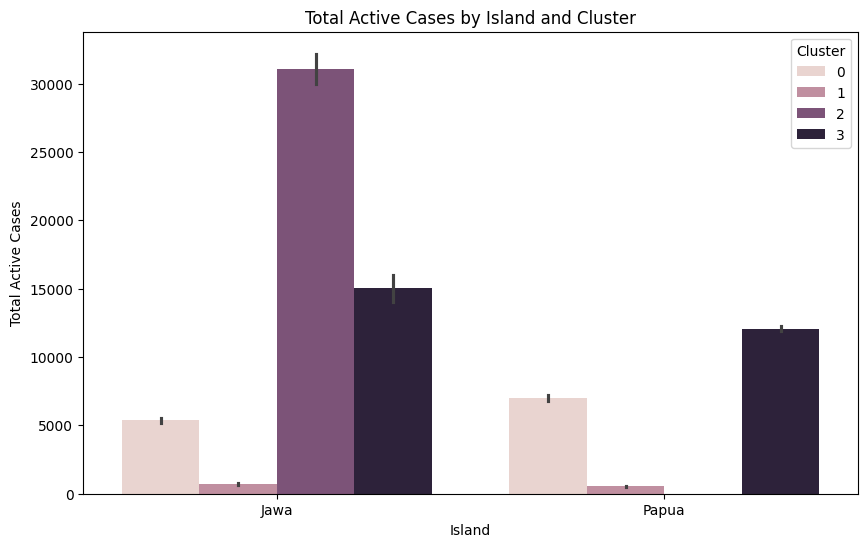

In [16]:
# Buat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Island', y='Total Active Cases', hue='Cluster', data=data)
plt.title('Total Active Cases by Island and Cluster')
plt.xlabel('Island')
plt.ylabel('Total Active Cases')
plt.legend(title='Cluster')
plt.show()

## 2. Bagaimana densitas penduduk memengaruhi tingkat kematian atau pemulihan?

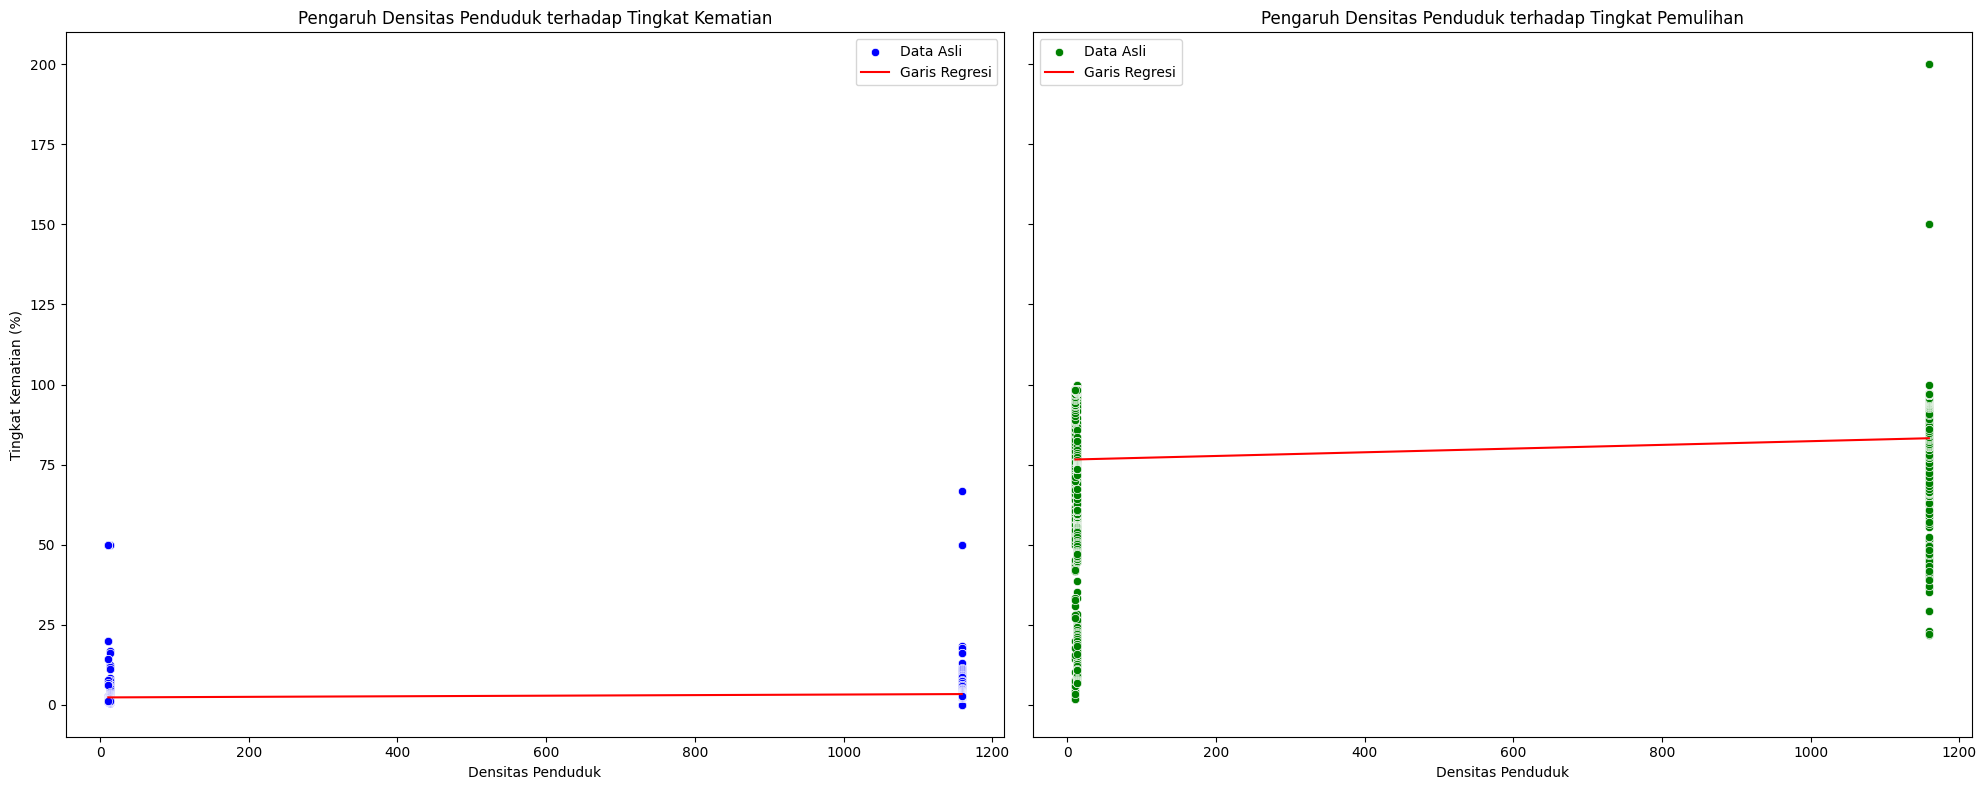

In [ ]:
# Visualisasi gabungan
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Scatterplot dan regresi untuk tingkat kematian
sns.scatterplot(ax=axes[0], x='Population Density', y='Case Fatality Rate', data=data, color='blue', label='Data Asli')
axes[0].plot(data['Population Density'], y_pred_fatality, color='red', label='Garis Regresi')
axes[0].set_title('Pengaruh Densitas Penduduk terhadap Tingkat Kematian')
axes[0].set_xlabel('Densitas Penduduk')
axes[0].set_ylabel('Tingkat Kematian (%)')
axes[0].legend()

# Scatterplot dan regresi untuk tingkat pemulihan
sns.scatterplot(ax=axes[1], x='Population Density', y='Case Recovered Rate', data=data, color='green', label='Data Asli')
axes[1].plot(data['Population Density'], y_pred_recovery, color='red', label='Garis Regresi')
axes[1].set_title('Pengaruh Densitas Penduduk terhadap Tingkat Pemulihan')
axes[1].set_xlabel('Densitas Penduduk')
axes[1].legend()

plt.tight_layout()
plt.show()


In [18]:
data.to_csv('studi-kasus-covid-daming.csv', index=False)